<a href="https://colab.research.google.com/github/harttu/courses/blob/main/DeepLearningWithPytorch/Chapter5_model_from_scratch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Chapter 5 - From mysterious thermometer readings predict the temperature in celcius



In [2]:
import math
import torch
import pandas as pd

%matplotlib inline
from matplotlib import pyplot as plt
from matplotlib.pyplot import figure

T_c are temperature in Celcius and T_u are temperature in unknown units

In [3]:
t_c = [ 0.5, 14.0, 28.0, 11.0,  8.0,  3.0, -4.0,  6.0, 13.0, 21.0 ]
t_u = [35.7, 58.2, 81.9, 56.3, 48.9, 33.9, 21.8, 48.4, 60.4, 68.4 ]
t_c = torch.tensor(t_c)
t_u = torch.tensor(t_u)

Our model: Given a measurement in unknown unit, what is the temperature in Celsius 

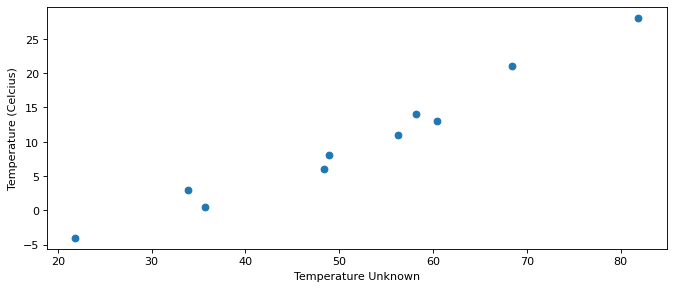

In [4]:
fig = plt.figure(figsize=(10, 4), dpi=80)
plt.ylabel("Temperature (Celcius)")
plt.xlabel("Temperature Unknown")
plt.scatter(t_u.numpy(), t_c.detach().numpy() )

Linear model and mean of squared errors loss function

In [5]:
def model(t_u, w, b):
  return w * t_u + b

def loss_fn(t_p,t_c):
  return ((t_p - t_c ) ** 2).mean()

init weights

In [6]:
w = torch.ones(())
b = torch.zeros(())
w,b

(tensor(1.), tensor(0.))

In [7]:
t_p = model(t_u,w,b)

Example predictions with init. weights

In [8]:
pd.DataFrame([t_p.numpy(),
              t_c.numpy()], 
             index=["Predicted","Gold (celcius)"])

,0,1,2,3,4,5,6,7,8,9
Predicted,35.700001,58.200001,81.900002,56.299999,48.900002,33.900002,21.799999,48.400002,60.400002,68.400002
Gold (celcius),0.500000,14.000000,28.000000,11.000000,8.000000,3.000000,-4.000000,6.000000,13.000000,21.000000


In [9]:
loss_fn(t_p,t_c)

tensor(1773.4521)

Naivi tapa laskea kulmakerrointa. Ei skaalaudu

In [10]:
delta = 0.1

loss_rate_of_change_w = \
  (loss_fn(model(t_u, w + delta, b), t_c) -
   loss_fn(model(t_u, w - delta, b), t_c)) / ( 2.0 * delta )

In [11]:
learning_rate = 1e-2

w  = w - learning_rate * loss_rate_of_change_w

In [12]:
loss_rate_of_change_b = \
  ( loss_fn( model( t_u, w, b + delta ), t_c ) -
    loss_fn( model( t_u, w, b - delta ), t_c ) ) / (2.0 * delta) 

b = b - learning_rate * loss_rate_of_change_b

In [13]:
t_p = model(t_u,w,b)
loss_fn(t_p,t_c)

tensor(5542710.)

Ilman muuttujien normalisointia kouluttamisesta tulee hidasta ja työlästä. Jos normalisointi tehdään, pitää muistaa että normalisointi tulee osaksi mallia ja se pitää toteuttaa aina kun malliin syötetään dataa.

In [14]:
delta = 0.05
learning_rate = 1e-2
t_gold = t_c
w = torch.ones(())
b = torch.zeros(())

w_a = list()
b_a = list()

t_un = t_u * 0.1

max_iter = 100 * 50
for i in range(0,(max_iter) + 1):
  loss_rate_of_change_w = \
    (loss_fn(model(t_un, w + delta, b), t_c) - 
     loss_fn(model(t_un, w - delta, b), t_c)) / ( 2.0 * delta )
  #loss_rate_of_change_w = \
  #  (loss_fn( t_u * ( w + delta ) + b , t_c) - 
  #   loss_fn( t_u * ( w - delta ) +  b , t_c)) / ( 2.0 * delta )
  loss_rate_of_change_b = \
    ( loss_fn( model( t_un, w, b + delta ), t_c ) - 
      loss_fn( model( t_un, w, b - delta ), t_c ) ) / (2.0 * delta) 
  w = w - learning_rate * loss_rate_of_change_w # '-' because we move against the gradient
  b = b - learning_rate * loss_rate_of_change_b
  t_predicted = w * t_un + b

  w_a.append(w)
  b_a.append(b)
  
  if i % 500 == 0:
    print("Iter: {} - w: {} - b:{} - Loss: {}".format(i,w,b,loss_fn(t_predicted, t_gold)))  
    print("  loss_rate_of_change_w:{} - w:{}"
            .format(loss_rate_of_change_w,
                    w))
    print("  loss_rate_of_change_b:{} - b:{}"
            .format(loss_rate_of_change_b,
                    b))

Iter: 0 - w: 1.7480902671813965 - b:0.0982208251953125 - Loss: 39.783042907714844
  loss_rate_of_change_w:-74.80903625488281 - w:1.7480902671813965
  loss_rate_of_change_b:-9.82208251953125 - b:0.0982208251953125
Iter: 500 - w: 4.111572742462158 - b:-10.438047409057617 - Loss: 7.420060634613037
  loss_rate_of_change_w:-0.22670745849609375 - w:4.111572742462158
  loss_rate_of_change_b:1.2850570678710938 - b:-10.438047409057617
Iter: 1000 - w: 4.847244739532471 - b:-14.608223915100098 - Loss: 3.579784393310547
  loss_rate_of_change_w:-0.0889897346496582 - w:4.847244739532471
  loss_rate_of_change_b:0.5044817924499512 - b:-14.608223915100098
Iter: 1500 - w: 5.136051177978516 - b:-16.245328903198242 - Loss: 2.9879391193389893
  loss_rate_of_change_w:-0.03495454788208008 - w:5.136051177978516
  loss_rate_of_change_b:0.1980423927307129 - b:-16.245328903198242
Iter: 2000 - w: 5.249431610107422 - b:-16.888029098510742 - Loss: 2.8967268466949463
  loss_rate_of_change_w:-0.013720989227294922 - w

In [15]:
t_un = t_u * 0.1
t_a = list()

for i in range(0,100,20):
  if i == 0:
    continue
  print(i)
  indeksi = math.ceil( i * ( max_iter / 100 ) )
  t_a.append(w_a[indeksi] * t_un + b_a[indeksi])

20
40
60
80


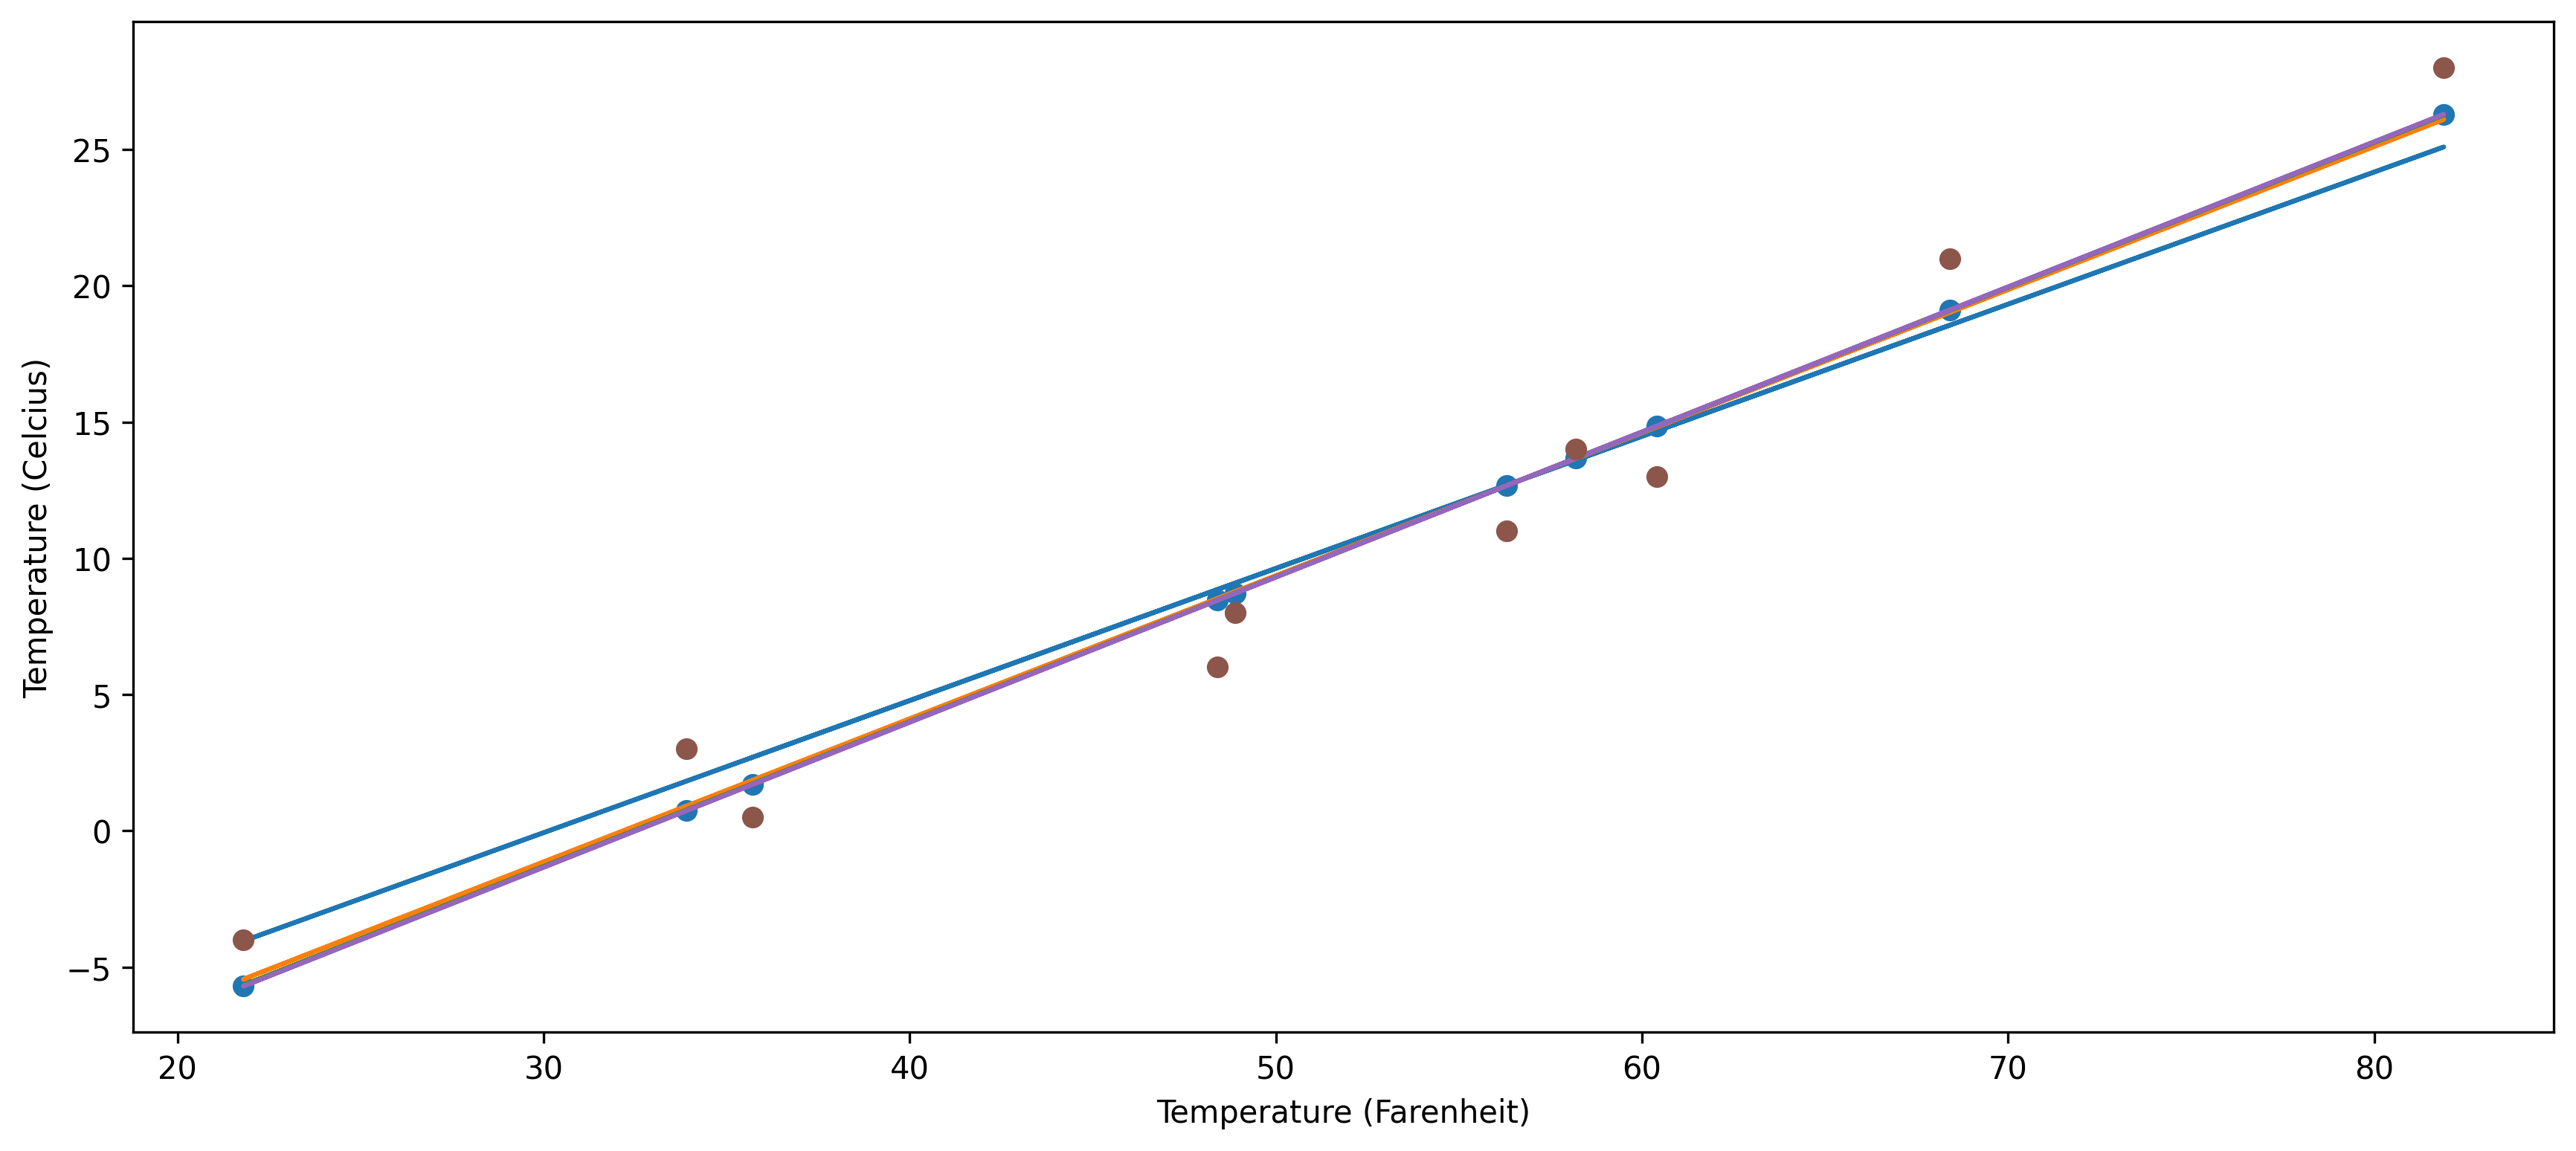

In [16]:
t_un = t_u * 0.1
t_p = w * t_un + b

fig = plt.figure(figsize=(14, 6), dpi=300)
#fig = plt.figure(dpi = 600)
plt.xlabel("Temperature (Farenheit)")
plt.ylabel("Temperature (Celcius)")

for t_p_vali in t_a:
  plt.plot(t_u.numpy(), t_p_vali.detach().numpy() )

plt.scatter(t_u.numpy(), t_p.detach().numpy() )
plt.plot(t_u.numpy(), t_p.detach().numpy() )

plt.plot(t_u.numpy(), t_c.numpy(), 'o',  )

In [17]:
w,b

(tensor(5.3224), tensor(-17.3019))

Eli nykyisessä w:n ja b:n ympäristössä, LOSSin arvo muuttuu seuraavissa suhteissa pieniin w:n ja b:n muutoksiin

In [18]:
loss_rate_of_change_w,loss_rate_of_change_b

(tensor(-3.5763e-05), tensor(0.0003))

In [19]:
def dloss_fn(t_p,t_c):
  dsquared_diffs = 2 * ( t_p - t_c) / t_p.size(0) # t_p.size(0) -> 10
  return dsquared_diffs

In [20]:
t_p.size(0)

10

In [21]:

def dmodel_dw(t_u,w,b):
  return t_u


def dmodel_db(t_u,w,b):
  return 1


In [22]:
def grad_fn(t_u,t_c,t_p,w,b):
  dloss_dtp = dloss_fn(t_p,t_c)
  dloss_dw = dloss_dtp * dmodel_dw(t_u,w,b)
  dloss_db = dloss_dtp * dmodel_db(t_u,w,b)
  return torch.stack( [ dloss_dw.sum(), dloss_db.sum() ] )

In [23]:
def training_loop( n_epochs, learning_rate, params, t_u, t_c):
  for epoch in range(1, n_epochs + 1):
    w, b = params
    #print("W:{}, b:{}".format(w,b))
    t_p = model(t_u,w,b) # forward pass
    loss = loss_fn(t_p,t_c)
    grad = grad_fn(t_u,t_c,t_p,w,b) # backward pass

    params = params - learning_rate * grad
    if epoch % 500 == 0:
      print('Epochs %d, Loss %f' % (epoch, float(loss)))

  return params

In [24]:
t_un = 0.1 * t_u

In [25]:
t_c,t_u,t_un

(tensor([ 0.5000, 14.0000, 28.0000, 11.0000,  8.0000,  3.0000, -4.0000,  6.0000,
         13.0000, 21.0000]),
 tensor([35.7000, 58.2000, 81.9000, 56.3000, 48.9000, 33.9000, 21.8000, 48.4000,
         60.4000, 68.4000]),
 tensor([3.5700, 5.8200, 8.1900, 5.6300, 4.8900, 3.3900, 2.1800, 4.8400, 6.0400,
         6.8400]))

In [26]:
params = training_loop(n_epochs = 5000,
              learning_rate = 1e-2,
              params = torch.tensor([1.0,0.0]),
              t_u = t_un,
              t_c = t_c)

params

Epochs 500, Loss 7.454174
Epochs 1000, Loss 3.585042
Epochs 1500, Loss 2.988752
Epochs 2000, Loss 2.896853
Epochs 2500, Loss 2.882690
Epochs 3000, Loss 2.880507
Epochs 3500, Loss 2.880171
Epochs 4000, Loss 2.880119
Epochs 4500, Loss 2.880111
Epochs 5000, Loss 2.880110


tensor([  5.3224, -17.3019])

In [27]:
%matplotlib inline
from matplotlib import pyplot as plt

t_p = model(t_un, *params)

In [28]:
params

tensor([  5.3224, -17.3019])

In [29]:
w, b = params
t_un[0] * w + b

tensor(1.6992)

In [30]:
t_c, t_p, t_u

(tensor([ 0.5000, 14.0000, 28.0000, 11.0000,  8.0000,  3.0000, -4.0000,  6.0000,
         13.0000, 21.0000]),
 tensor([ 1.6992, 13.6747, 26.2889, 12.6635,  8.7249,  0.7412, -5.6990,  8.4587,
         14.8457, 19.1036]),
 tensor([35.7000, 58.2000, 81.9000, 56.3000, 48.9000, 33.9000, 21.8000, 48.4000,
         60.4000, 68.4000]))

In [31]:
t_u.numpy(), t_p.numpy()

(array([35.7, 58.2, 81.9, 56.3, 48.9, 33.9, 21.8, 48.4, 60.4, 68.4],
       dtype=float32),
 array([ 1.699234 , 13.674725 , 26.288908 , 12.66346  ,  8.724855 ,
         0.7411938, -5.6989584,  8.458733 , 14.845663 , 19.103613 ],
       dtype=float32))

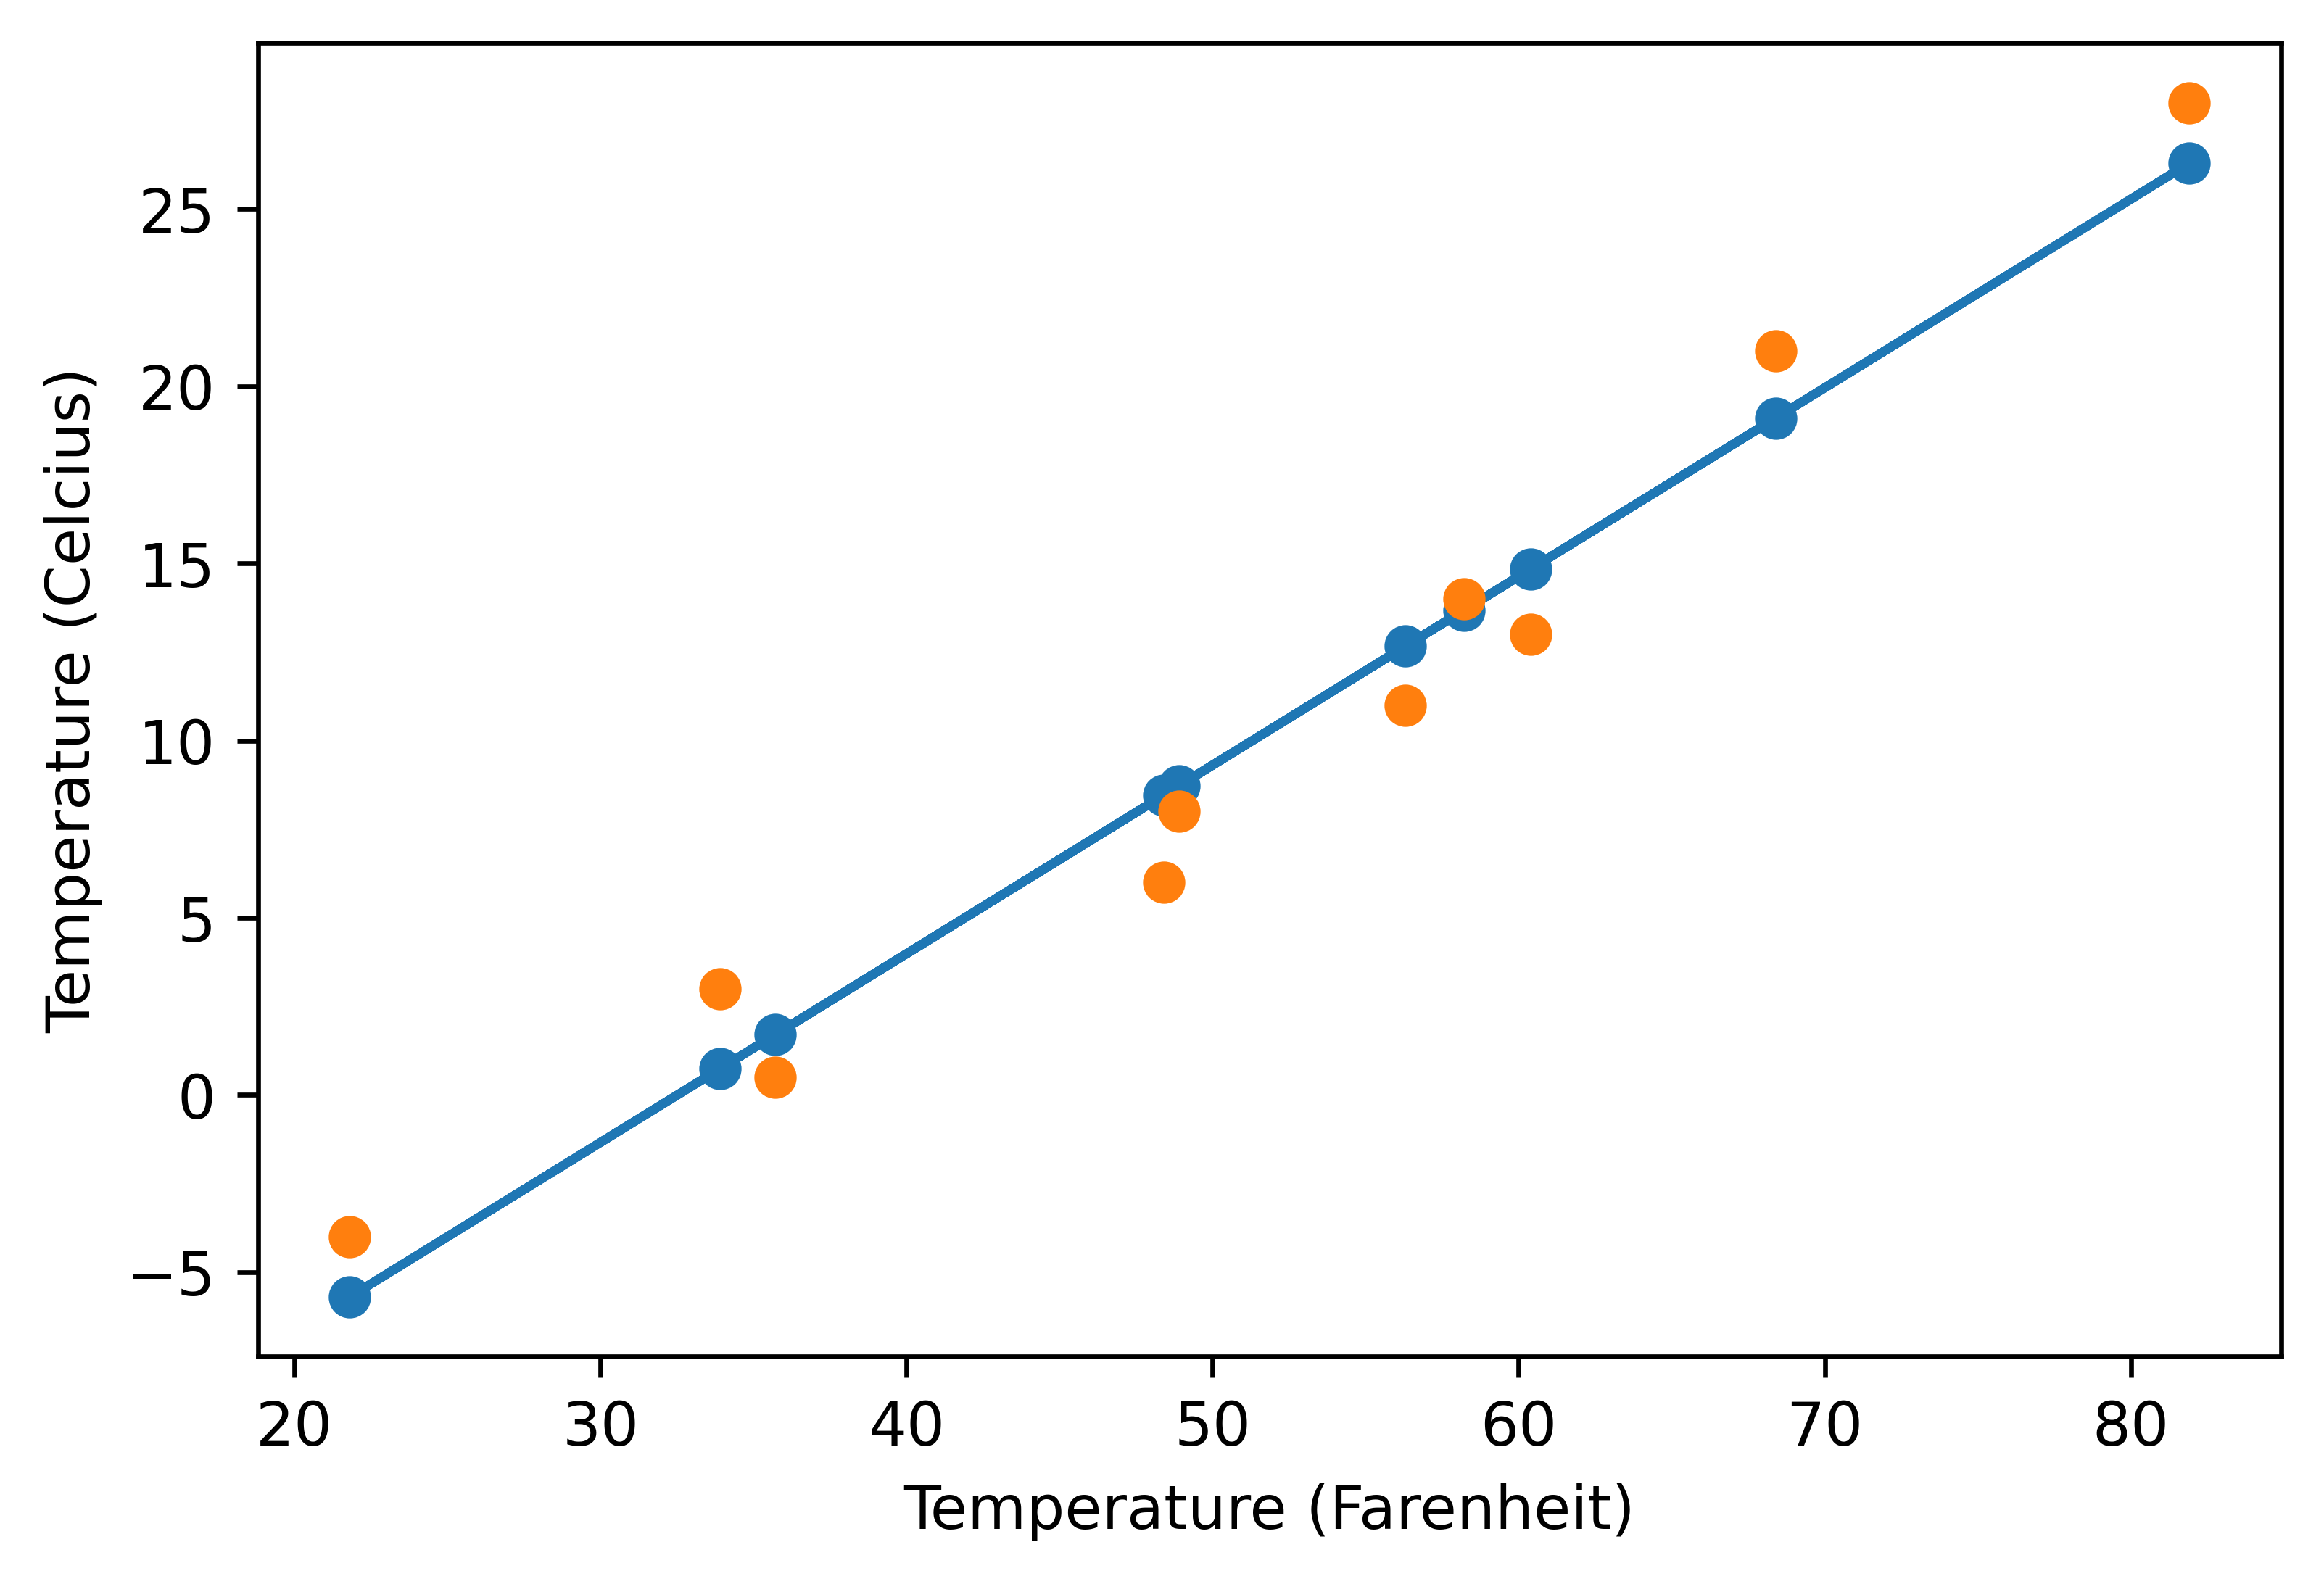

In [32]:
fig = plt.figure(dpi = 600)
plt.xlabel("Temperature (Farenheit)")
plt.ylabel("Temperature (Celcius)")
plt.scatter(t_u.numpy(), t_p.detach().numpy() )
plt.plot(t_u.numpy(), t_p.detach().numpy() )

plt.plot(t_u.numpy(), t_c.numpy(), 'o')

In [33]:
## Using Autograd

## Using Autograd

In [34]:
params = torch.tensor([1.0, 0.0], requires_grad = True)
params.grad is None

True

In [35]:
#w,b = params
#loss = loss_fn(model(t_u, w,b), t_c)
loss = loss_fn(model(t_u, *params), t_c)

loss.backward()

params.grad

tensor([4512.2241,   82.6800])

In [36]:
if params.grad is not None:
  params.grad.zero_()

In [37]:
def training_loop(n_epochs, learning_rate, params, t_u, t_c):
  for epoch in range(1, n_epochs + 1):
    if params.grad is not None:
      params.grad.zero_()

    t_p = model(t_u, *params)
    loss = loss_fn(t_p, t_c) # params goes to this function
    # calculate the gradient
    loss.backward() # call for all variables, so all variables associated with hte call, will have the grad property accumulated 

    # update parameters
    with torch.no_grad():
      params -= learning_rate * params.grad # away from higher value, against the gradient
 
    if epoch % 500 == 0:
      print("Epoch %d, Loss %f" % (epoch, float(loss) ) )

  return params

In [38]:
training_loop(n_epochs = 5000,
              learning_rate = 1e-2,
              params = torch.tensor([1.0, 0.0], requires_grad= True),
              t_u = t_un,
              t_c = t_c )

Epoch 500, Loss 7.454174
Epoch 1000, Loss 3.585042
Epoch 1500, Loss 2.988752
Epoch 2000, Loss 2.896853
Epoch 2500, Loss 2.882690
Epoch 3000, Loss 2.880507
Epoch 3500, Loss 2.880171
Epoch 4000, Loss 2.880119
Epoch 4500, Loss 2.880111
Epoch 5000, Loss 2.880110


tensor([  5.3224, -17.3019], requires_grad=True)

In [39]:
import torch.optim as optim

dir(optim)

['ASGD',
 'Adadelta',
 'Adagrad',
 'Adam',
 'AdamW',
 'Adamax',
 'LBFGS',
 'NAdam',
 'Optimizer',
 'RAdam',
 'RMSprop',
 'Rprop',
 'SGD',
 'SparseAdam',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '_functional',
 '_multi_tensor',
 'lr_scheduler',
 'swa_utils']

In [40]:
params = torch.tensor([1.0, 0.0], requires_grad=True)
learning_rate = 1e-5
optimizer = optim.SGD([params], lr=learning_rate)

In [41]:
t_p = model(t_u,*params)
loss = loss_fn(t_p,t_c)

optimizer.zero_grad() # revert accumulated gradient

loss.backward() # triggers grad on params

# optimizer looks into params.grad and updates params, substracting learnig_rate times grad from it
optimizer.step()

params

tensor([ 9.5488e-01, -8.2680e-04], requires_grad=True)

In [42]:
def training_loop(n_epochs, optimizer, params, t_u, t_c):
  for epoch in range(1, n_epochs + 1):
    t_p = model(t_u, *params)
    loss = loss_fn(t_p, t_c) # params goes to this function
   
    # reset gradient
    optimizer.zero_grad()

    # calculate the gradient
    loss.backward() # call for all variables, so all variables associated with hte call, will have the grad property accumulated 

    optimizer.step() # updates params according to learning rate

    # replaces gradient update:
    # update parameters
    #with torch.no_grad():
    #  params -= learning_rate * params.grad # away from higher value, against the gradient
 
    if epoch % 500 == 0:
      print("Epoch %d, Loss %f" % (epoch, float(loss) ) )

  return params

In [43]:
params = torch.tensor([1.0, 0.0], requires_grad= True)
optimizer = optim.SGD([params], lr=1e-2)

training_loop(n_epochs = 5000,
              optimizer = optimizer,
              params = params,
              t_u = t_un,
              t_c = t_c )

Epoch 500, Loss 7.454174
Epoch 1000, Loss 3.585042
Epoch 1500, Loss 2.988752
Epoch 2000, Loss 2.896853
Epoch 2500, Loss 2.882690
Epoch 3000, Loss 2.880507
Epoch 3500, Loss 2.880171
Epoch 4000, Loss 2.880119
Epoch 4500, Loss 2.880111
Epoch 5000, Loss 2.880110


tensor([  5.3224, -17.3019], requires_grad=True)

In [44]:
params = torch.tensor([1.0, 0.0], requires_grad= True)
optimizer = optim.Adam([params], lr=1e-1)

training_loop(n_epochs = 2000,
              optimizer = optimizer,
              params = params,
              t_u = t_u, # t_u opposed to t_un
              t_c = t_c )

Epoch 500, Loss 7.288722
Epoch 1000, Loss 2.988471
Epoch 1500, Loss 2.880495
Epoch 2000, Loss 2.880110


tensor([  0.5323, -17.3022], requires_grad=True)

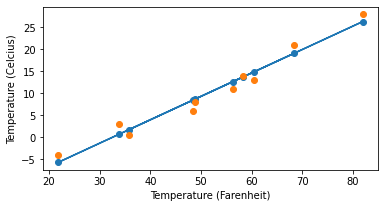

In [45]:
w,b = params
t_p = t_u * w + b

fig = plt.figure(figsize=(6, 3) ) #, dpi=300)

plt.xlabel("Temperature (Farenheit)")
plt.ylabel("Temperature (Celcius)")
plt.scatter(t_u.numpy(), t_p.detach().numpy() )
plt.plot(t_u.numpy(), t_p.detach().numpy() )

plt.plot(t_u.numpy(), t_c.numpy(), 'o')

### Splitting data

Rule 1:if the training loss is not decreasing, chances are the model is too simple for the data

Rule 2: if the training loss and the validation loss diverge, we're overfitting

In [47]:
n_samples = t_u.shape[0]
n_val = int(0.2 * n_samples)

shuffled_indices = torch.randperm(n_samples)

train_indices = shuffled_indices[:-n_val]
val_indices = shuffled_indices[-n_val:]

shuffled_indices, train_indices,  val_indices

(tensor([8, 1, 7, 2, 6, 4, 0, 5, 9, 3]),
 tensor([8, 1, 7, 2, 6, 4, 0, 5]),
 tensor([9, 3]))

In [49]:
train_t_u = t_u[train_indices]
train_t_c = t_c[train_indices]

val_t_u = t_u[val_indices]
val_t_c = t_c[val_indices]

train_t_un = 0.1 * train_t_u
val_t_un = 0.1 * val_t_u

In [60]:
def training_loop(n_epochs, optimizer, params, train_t_u, val_t_u, train_t_c, val_t_c, train_losses, val_losses):
  for epoch in range(1,n_epochs + 1):
    train_t_p = model(train_t_u, *params)
    train_loss = loss_fn(train_t_p, train_t_c)

    val_t_p = model(val_t_u, *params)
    val_loss = loss_fn(val_t_p, val_t_c)

    train_losses.append(train_loss.detach().numpy())
    val_losses.append(val_loss.detach().numpy())

    optimizer.zero_grad()
    train_loss.backward()
    optimizer.step()

    if epoch <= 3 or epoch % 500 == 0:
      print(f"Epoch {epoch}, Training loss {train_loss.item():.4f}",
            f" Validation loss {val_loss.item():.4}")

In [61]:
train_losses = list()
val_losses = list()
params = torch.tensor( [1.0, 0.0], requires_grad = True )
learning_rate = 1e-2
optimizer = optim.SGD([params], lr=learning_rate)

training_loop(
    n_epochs = 3000,
    optimizer = optimizer,
    params = params,
    train_t_u = train_t_un,
    val_t_u = val_t_un,
    train_t_c = train_t_c,
    val_t_c = val_t_c,
    train_losses = train_losses,
    val_losses = val_losses
)

Epoch 1, Training loss 70.8222  Validation loss 114.7
Epoch 2, Training loss 42.7923  Validation loss 50.3
Epoch 3, Training loss 37.0547  Validation loss 31.5
Epoch 500, Training loss 6.4172  Validation loss 7.236
Epoch 1000, Training loss 3.1714  Validation loss 4.491
Epoch 1500, Training loss 2.8163  Validation loss 3.783
Epoch 2000, Training loss 2.7775  Validation loss 3.571
Epoch 2500, Training loss 2.7732  Validation loss 3.503
Epoch 3000, Training loss 2.7728  Validation loss 3.481


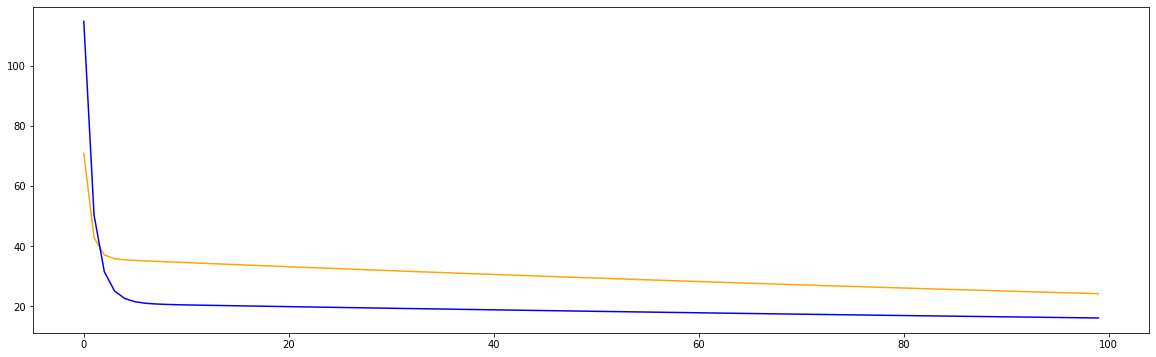

In [73]:
x = list(range(0,len(train_losses)))
#x

     
fig = plt.figure(figsize=(20, 6) ) #, dpi=300)

plt.plot(x[:100], train_losses[:100],'-',color="orange")
plt.plot(x[:100], val_losses[:100],'-',color="blue")


#plt.xlabel("Temperature (Farenheit)")
#plt.ylabel("Temperature (Celcius)")
#plt.scatter(t_u.numpy(), t_p.detach().numpy() )
#plt.plot(t_u.numpy(), t_p.detach().numpy() )



#plt.plot(t_u.numpy(), t_c.numpy(), 'o')

In [75]:
def calc_forward(t_u, t_c, is_train):
  with torch.set_grad_enbaled(is_train):
    t_p = model(t_uu, *params)
    loss = loss_fn(t_p,t_c)
  return loss

def training_loop(n_epochs, optimizer, params, train_t_u, val_t_u, train_t_c, val_t_c):
  for epoch in range(1,n_epochs + 1):
    train_t_p = model(train_t_u, *params)
    train_loss = loss_fn(train_t_p, train_t_c)

    with torch.no_grad():
      val_t_p = model(val_t_u, *params)
      val_loss = loss_fn(val_t_p, val_t_c)
      assert val_loss.requires_grad == False

    optimizer.zero_grad()
    train_loss.backward()
    optimizer.step()



In [103]:
def model(t_u, w, b):
  return w * t_u + b

def calc_forward(t_u, t_c, is_train):
  with torch.set_grad_enabled(is_train):
    t_p = model(t_u, *params)
    loss = loss_fn(t_p,t_c)
  return loss

def training_loop(n_epochs, optimizer, params, train_t_u, val_t_u, train_t_c, val_t_c):
  for epoch in range(1,n_epochs + 1):
    train_loss = calc_forward(train_t_u, train_t_c, True)
    val_loss = calc_forward(val_t_u, val_t_c, True)

    optimizer.zero_grad()
    train_loss.backward()
    optimizer.step()

    if epoch <= 3 or epoch % 500 == 0:
      print(f"Epoch {epoch}, Training loss {train_loss.item():.4f}",
            f" Validation loss {val_loss.item():.4}")


In [106]:
learning_rate = 1e-2

params = torch.tensor([1.0, 0.0], requires_grad = True)
optimizer = optim.SGD([params], lr=learning_rate)

training_loop(
    n_epochs = 3000,
    optimizer = optimizer,
    params = params,
    train_t_u = train_t_un,
    val_t_u = val_t_un,
    train_t_c = train_t_c,
    val_t_c = val_t_c
)

Epoch 1, Training loss 70.8222  Validation loss 114.7
Epoch 2, Training loss 42.7923  Validation loss 50.3
Epoch 3, Training loss 37.0547  Validation loss 31.5
Epoch 500, Training loss 6.4172  Validation loss 7.236
Epoch 1000, Training loss 3.1714  Validation loss 4.491
Epoch 1500, Training loss 2.8163  Validation loss 3.783
Epoch 2000, Training loss 2.7775  Validation loss 3.571
Epoch 2500, Training loss 2.7732  Validation loss 3.503
Epoch 3000, Training loss 2.7728  Validation loss 3.481


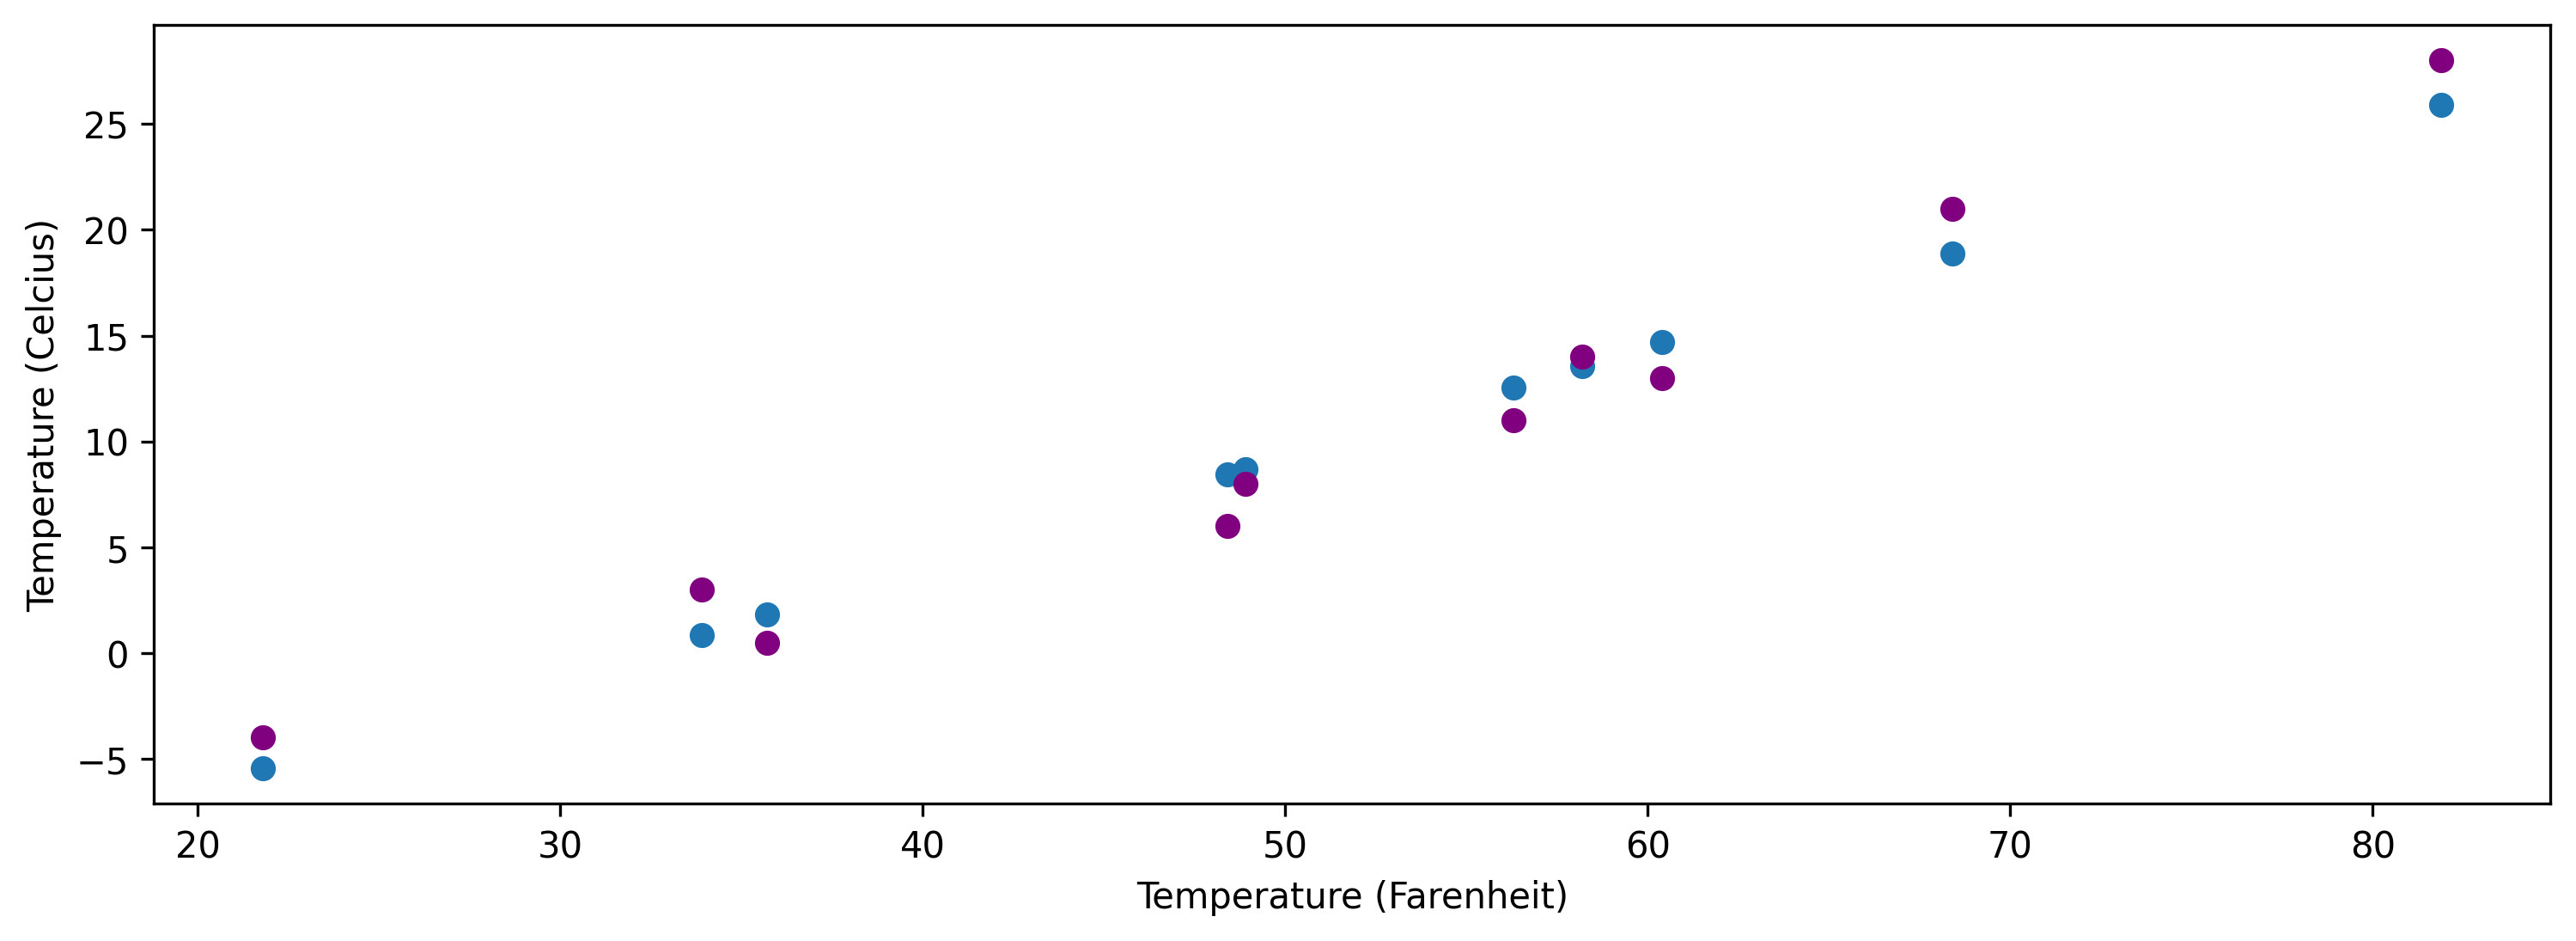

In [108]:
w, b = params.detach().numpy()

t_un = t_u * 0.1
t_p = w * t_un + b

fig = plt.figure(figsize=(12, 4), dpi=300)
#fig = plt.figure(dpi = 600)
plt.xlabel("Temperature (Farenheit)")
plt.ylabel("Temperature (Celcius)")

plt.scatter(t_u.numpy(), t_p.detach().numpy() )
#plt.plot(t_u.numpy(), t_p.detach().numpy() )

plt.plot(t_u.numpy(), t_c.numpy(), 'o', color="purple"  )

### Exercise

In [110]:
def model(t_u, w2, w1, b):
  return w2 * t_u ** 2  + w1 * t_u + b

def calc_forward(t_u, t_c, is_train):
  with torch.set_grad_enabled(is_train):
    t_p = model(t_u, *params)
    loss = loss_fn(t_p,t_c)
  return loss

def training_loop(n_epochs, optimizer, params, train_t_u, val_t_u, train_t_c, val_t_c):
  for epoch in range(1,n_epochs + 1):
    train_loss = calc_forward(train_t_u, train_t_c, True)
    val_loss = calc_forward(val_t_u, val_t_c, True)

    #with torch.no_grad():
    #  val_t_p = model(val_t_u, *params)
    #  val_loss = loss_fn(val_t_p, val_t_c)
    #  assert val_loss.requires_grad == False

    optimizer.zero_grad()
    train_loss.backward()
    optimizer.step()

    if epoch <= 3 or epoch % 500 == 0:
      print(f"Epoch {epoch}, Training loss {train_loss.item():.4f}",
            f" Validation loss {val_loss.item():.4}")


In [111]:
params = torch.tensor([0, 1.0, 0.0], requires_grad = True)
learning_rate = 1e-4
optimizer = optim.SGD([params], lr=learning_rate)

training_loop(
    n_epochs = 3000,
    optimizer = optimizer,
    params = params,
    train_t_u = train_t_un,
    val_t_u = val_t_un,
    train_t_c = train_t_c,
    val_t_c = val_t_c
)

params

Epoch 1, Training loss 70.8222  Validation loss 114.7
Epoch 2, Training loss 50.5907  Validation loss 78.27
Epoch 3, Training loss 38.1336  Validation loss 54.9
Epoch 500, Training loss 12.7065  Validation loss 7.04
Epoch 1000, Training loss 9.1153  Validation loss 6.081
Epoch 1500, Training loss 6.7919  Validation loss 5.406
Epoch 2000, Training loss 5.2881  Validation loss 4.924
Epoch 2500, Training loss 4.3144  Validation loss 4.576
Epoch 3000, Training loss 3.6834  Validation loss 4.322


tensor([ 0.5099, -0.7284, -0.8000], requires_grad=True)

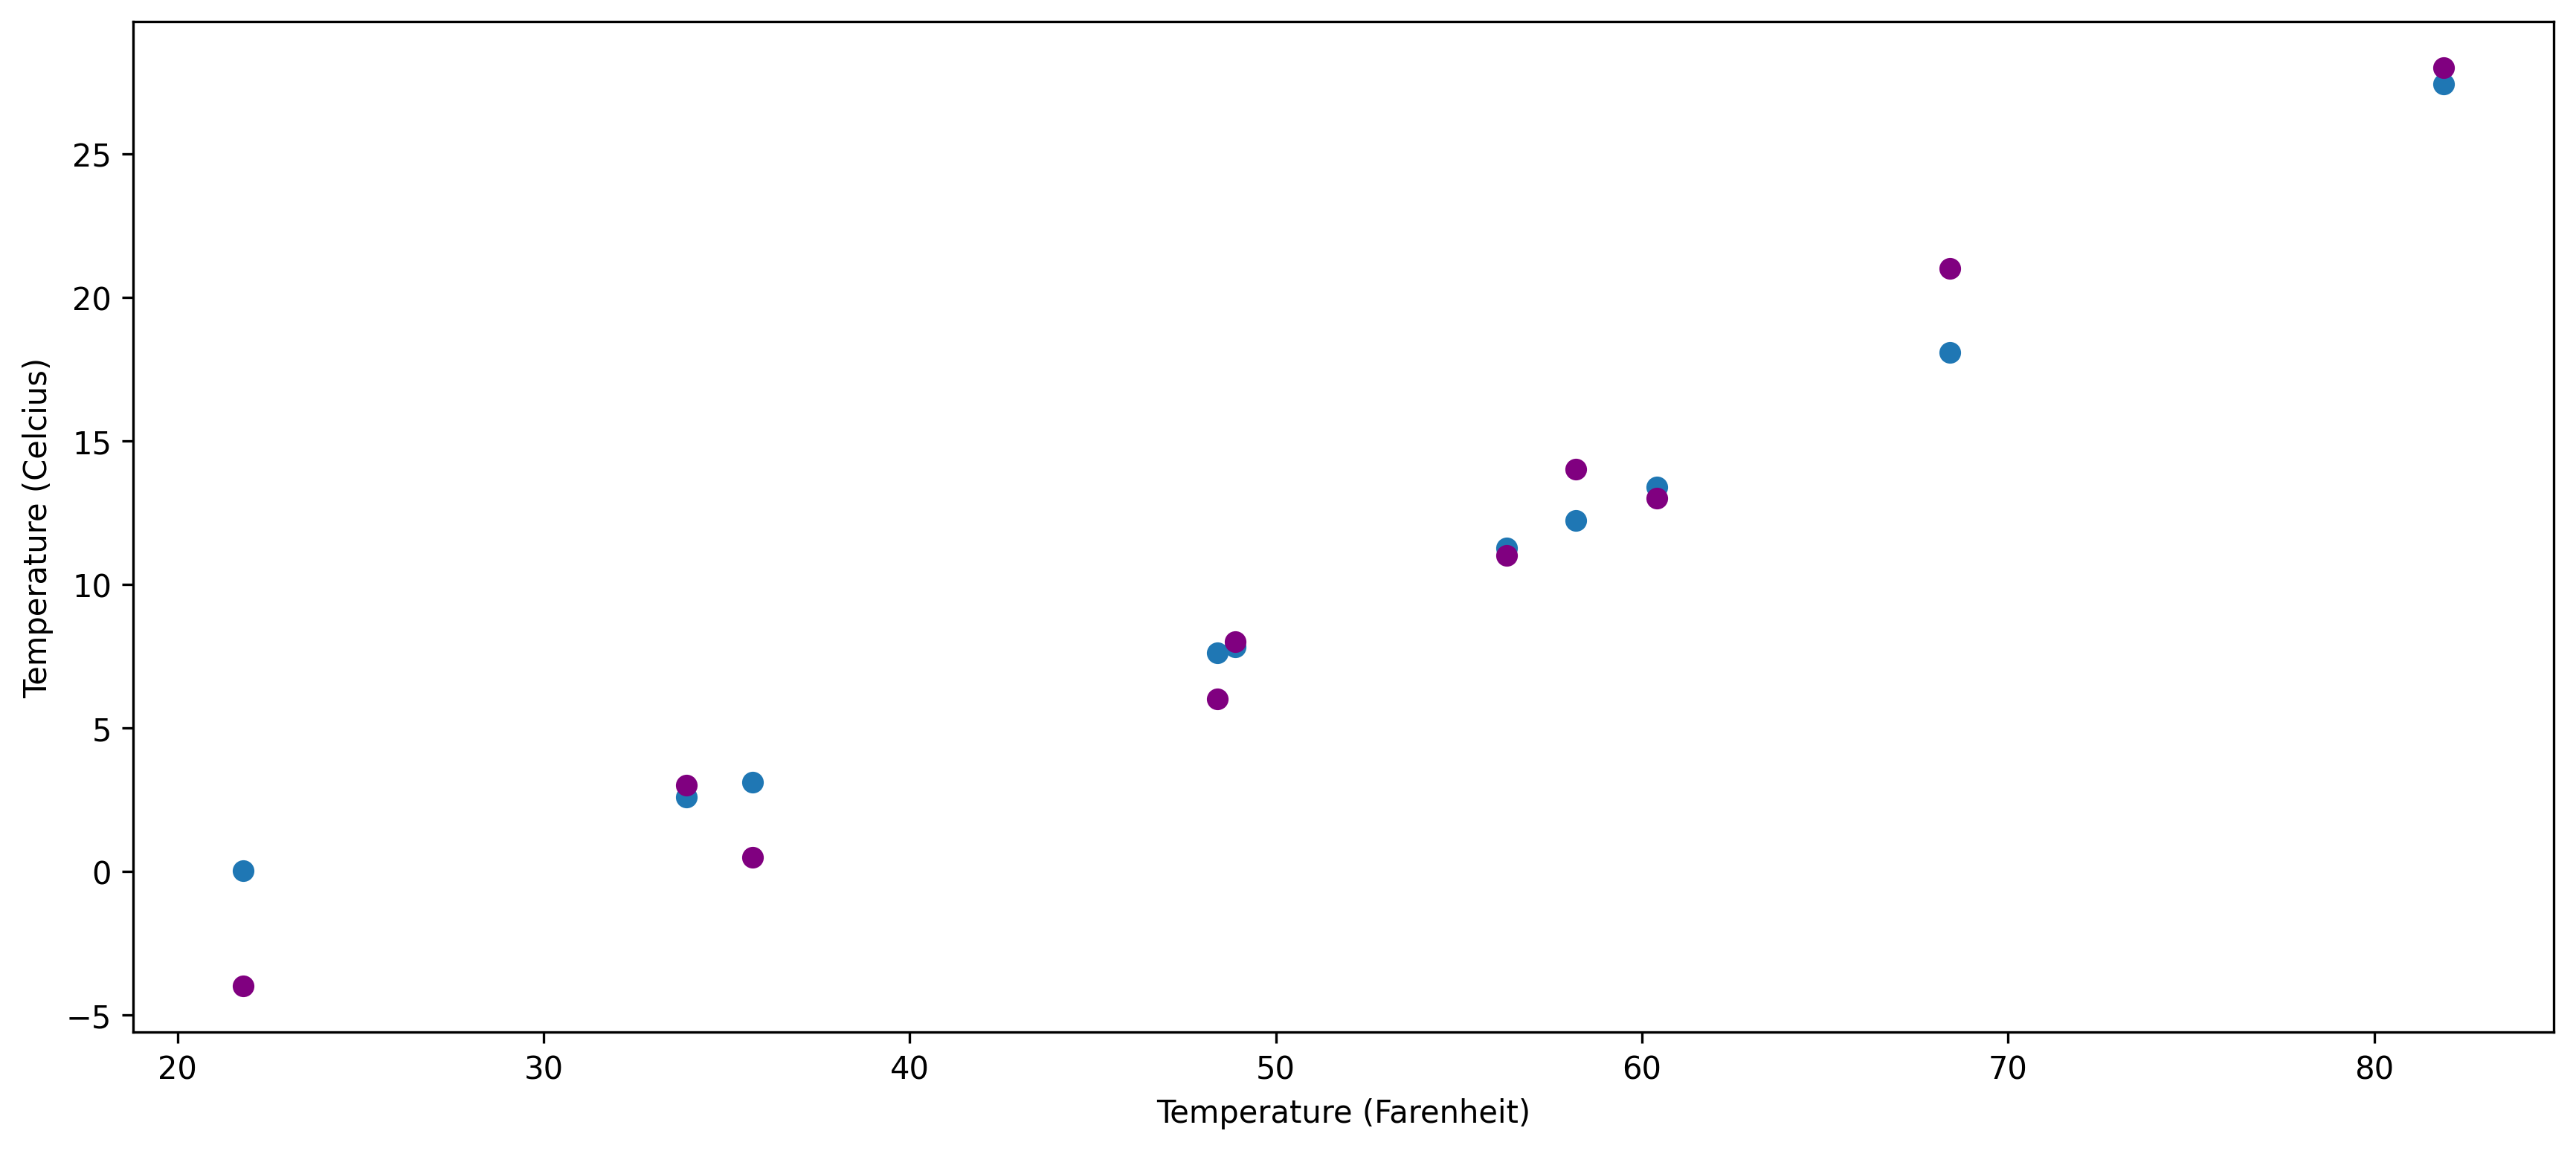

In [114]:
w2, w1, b = params.detach().numpy()

t_un = t_u * 0.1
t_p = w2 * t_un ** 2 + w1 * t_un + b

fig = plt.figure(figsize=(14, 6), dpi=300)
#fig = plt.figure(dpi = 600)
plt.xlabel("Temperature (Farenheit)")
plt.ylabel("Temperature (Celcius)")

plt.scatter(t_u.numpy(), t_p.detach().numpy() )
#plt.plot(t_u.numpy(), t_p.detach().numpy() )

plt.plot(t_u.numpy(), t_c.numpy(), 'o', color="purple"  )